In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
X = pd.read_csv('Training/X_train.csv',index_col='Unique_ID')
y = pd.read_csv('Training/y_train.csv',index_col='Unique_ID')
X.head()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
Unique_ID,,,,,,,,,,,,,,,,,,,,,
Candidate_5926,1,0,11,31,0,False,0,True,23.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
Candidate_48134,1,4,2,66,2,False,1,True,11.05,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
Candidate_51717,1,0,19,2,0,False,0,True,29.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
Candidate_26401,1,1,16,47,1,False,4,True,17.99,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
Candidate_34872,1,1,13,1,1,True,6,True,27.50,206.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [10]:
y.head()

,Dependent_Variable
Unique_ID,
Candidate_5926,1
Candidate_48134,0
Candidate_51717,1
Candidate_26401,0
Candidate_34872,0


In [5]:
X.shape

(33050, 43)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33050 entries, Candidate_5926 to Candidate_4714
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      33050 non-null  int64  
 1   C2      33050 non-null  int64  
 2   C3      33050 non-null  int64  
 3   C4      33050 non-null  int64  
 4   C5      33050 non-null  int64  
 5   C6      33050 non-null  bool   
 6   C7      33050 non-null  int64  
 7   C8      33050 non-null  bool   
 8   N1      33050 non-null  float64
 9   N2      28438 non-null  float64
 10  N3      32685 non-null  float64
 11  N4      28444 non-null  float64
 12  N5      28444 non-null  float64
 13  N6      32685 non-null  float64
 14  N7      32623 non-null  float64
 15  N8      33050 non-null  int64  
 16  N9      33050 non-null  int64  
 17  N10     32623 non-null  float64
 18  N10.1   32623 non-null  float64
 19  N11     32334 non-null  float64
 20  N12     28436 non-null  float64
 21  N14     32442 non-

## Comments:

As 6271 are available point of 33050 for N25 - N31 it would be better to drop this columns

In [7]:
X.describe()

,C1,C2,C3,C4,C5,C7,N1,N2,N3,N4,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
count,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.00000,28438.000000,32685.000000,28444.000000,...,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6220.000000,33050.000000,33050.000000,32623.000000
mean,1.119818,2.403873,12.856097,14.437398,1.719395,3.124932,19.97653,81.342710,3.359361,9.574075,...,20.084197,19.512199,0.526391,0.045288,7192.813526,2379.621620,0.744373,125.629394,224.313536,19.587254
std,0.399382,3.399024,12.013457,15.527474,1.320860,2.158905,8.11087,85.397795,0.411040,5.584756,...,16.045120,15.637882,2.144069,0.443838,6460.139952,3379.065104,50.764684,104.391919,186.513844,7.352667
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,-194.000000,20.000000,0.000000,2.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,13.45000,21.000000,3.200000,6.000000,...,9.000000,9.000000,0.000000,0.000000,3000.000000,0.000000,-31.000000,54.000000,98.740000,14.000000
50%,1.000000,1.000000,10.000000,10.000000,2.000000,4.000000,19.27500,53.000000,3.400000,9.000000,...,15.000000,14.000000,0.000000,0.000000,5000.000000,1108.440000,0.000000,90.000000,172.600000,19.000000
75%,1.000000,3.000000,20.000000,26.000000,2.000000,4.000000,26.90000,112.000000,3.600000,13.000000,...,28.000000,27.000000,0.000000,0.000000,9500.000000,3408.750000,32.000000,160.000000,300.947500,24.000000
max,3.000000,20.000000,51.000000,67.000000,7.000000,7.000000,48.00000,755.000000,4.400000,59.000000,...,120.000000,111.000000,42.000000,11.000000,60001.000000,22586.670000,257.000000,700.000000,2153.380000,64.000000


In [11]:
X.isnull().sum()

C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
N1           0
N2        4612
N3         365
N4        4606
N5        4606
N6         365
N7         427
N8           0
N9           0
N10        427
N10.1      427
N11        716
N12       4614
N14        608
N15        427
N16       4606
N17       4606
N18       4606
N19       4571
N20       4571
N21       4571
N22       4571
N23       2486
N24          0
N25      26779
N26      26779
N27      26779
N28      26779
N29      26779
N30      26779
N31      26779
N32      26830
N33          0
N34          0
N35        427
dtype: int64

In [15]:
y.value_counts()

Dependent_Variable
0                     22844
1                     10206
dtype: int64

## EDA

In [17]:
col = list(X.columns)

********************************************************************************
C1: Col bar plot
Cardinality:3


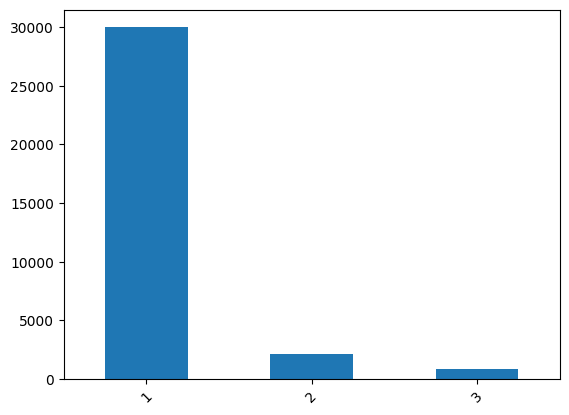

********************************************************************************
C2: Col bar plot
Cardinality:21


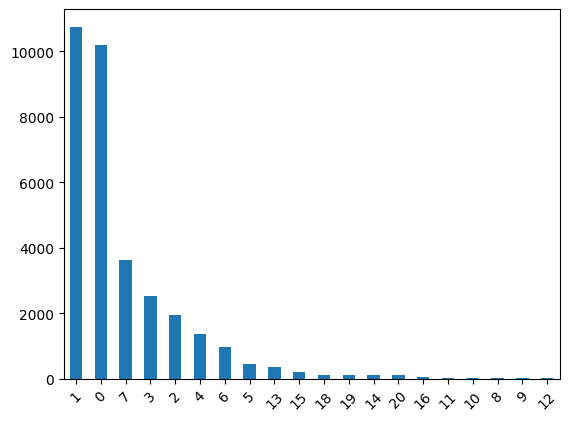

********************************************************************************
C3: Col bar plot
Cardinality:52


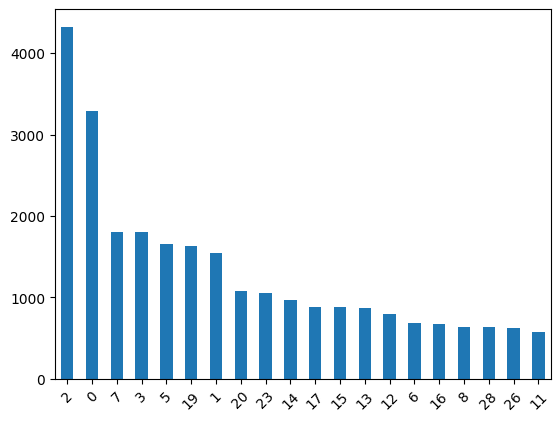

********************************************************************************
C4: Col bar plot
Cardinality:68


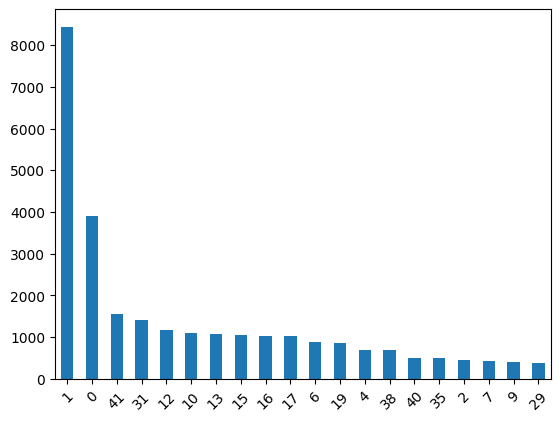

********************************************************************************
C5: Col bar plot
Cardinality:8


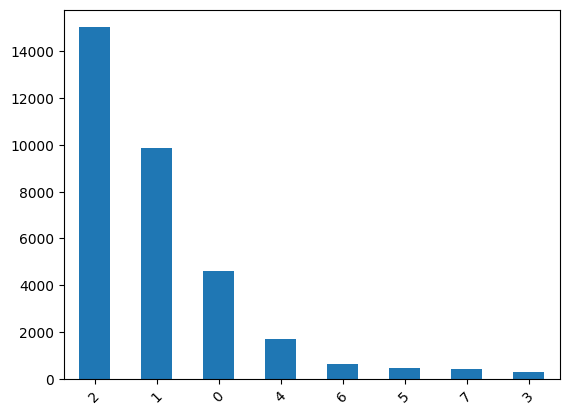

********************************************************************************
C6: Col bar plot
Cardinality:2


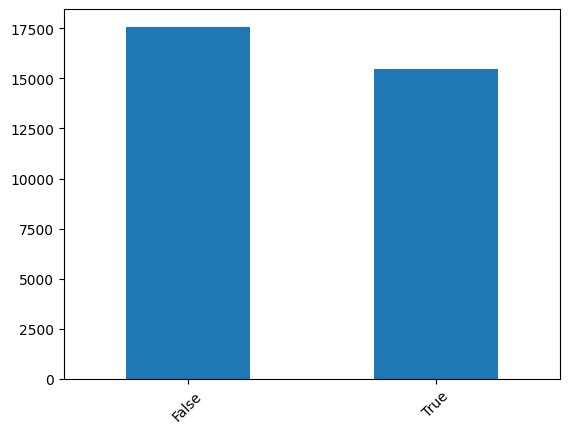

********************************************************************************
C7: Col bar plot
Cardinality:8


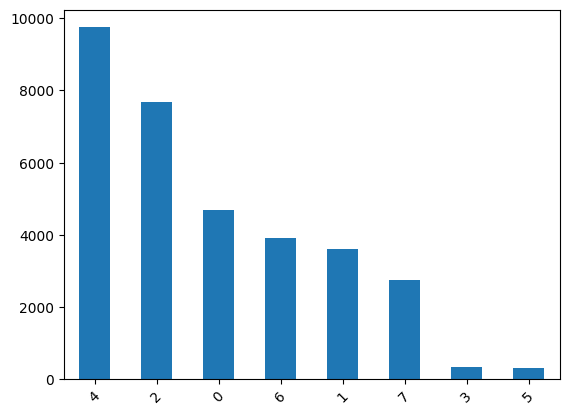

********************************************************************************
C8: Col bar plot
Cardinality:2


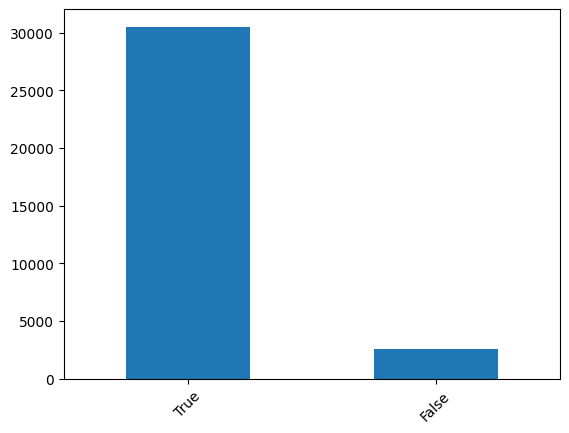

In [119]:
for el in col:
    if el.startswith('C'):
        print('*'*80)
        print(el+ ': Col bar plot')
        temp = X[el].value_counts()
        print('Cardinality:'+ str(len(temp)))
        temp[:20].plot(kind='bar')
        plt.xticks(rotation= 45)
        plt.show()

********************************************************************************
N1


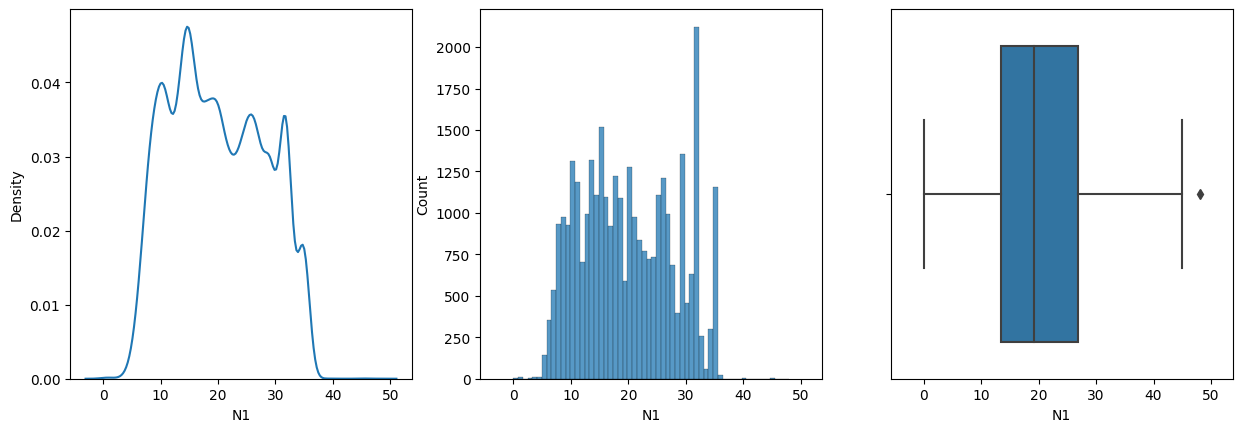

********************************************************************************
N2


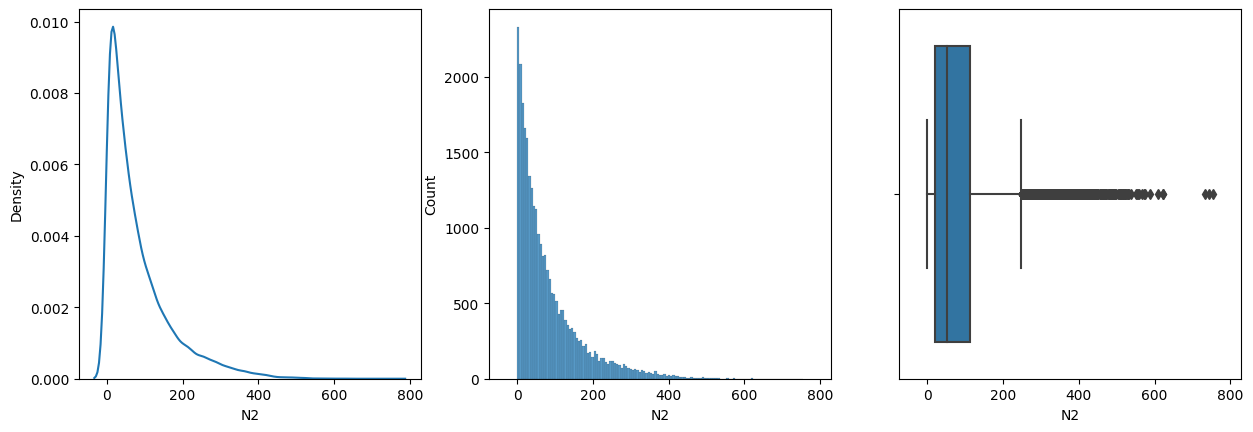

********************************************************************************
N3


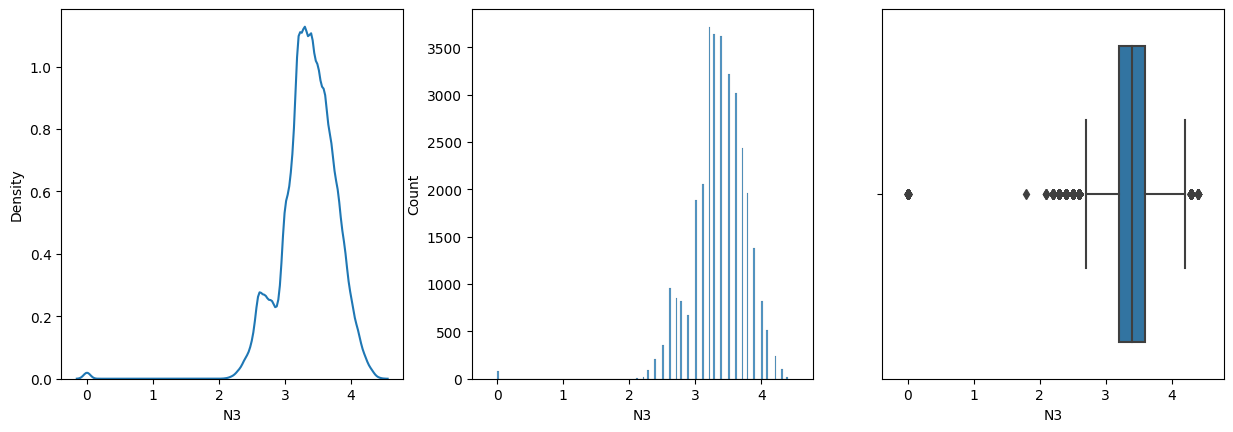

********************************************************************************
N4


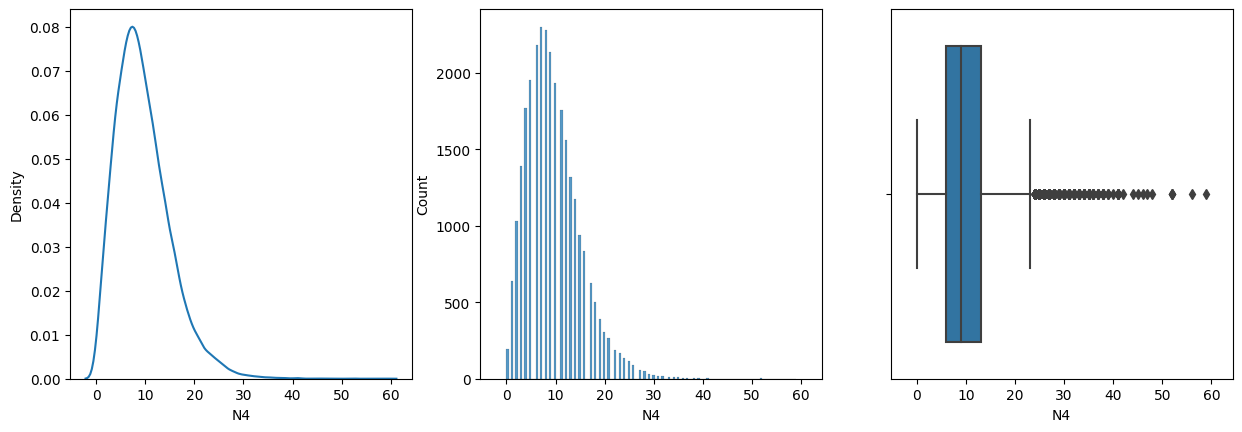

********************************************************************************
N5


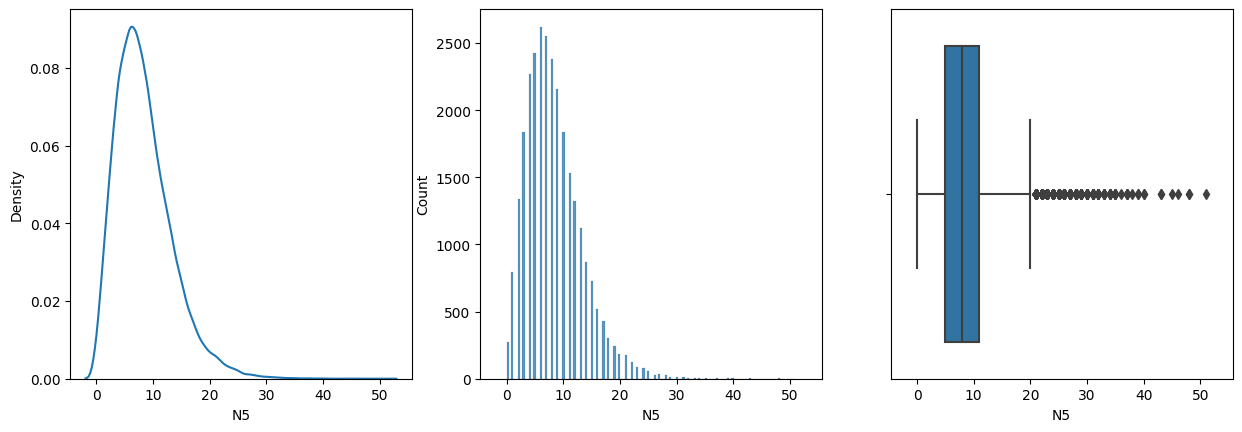

********************************************************************************
N6


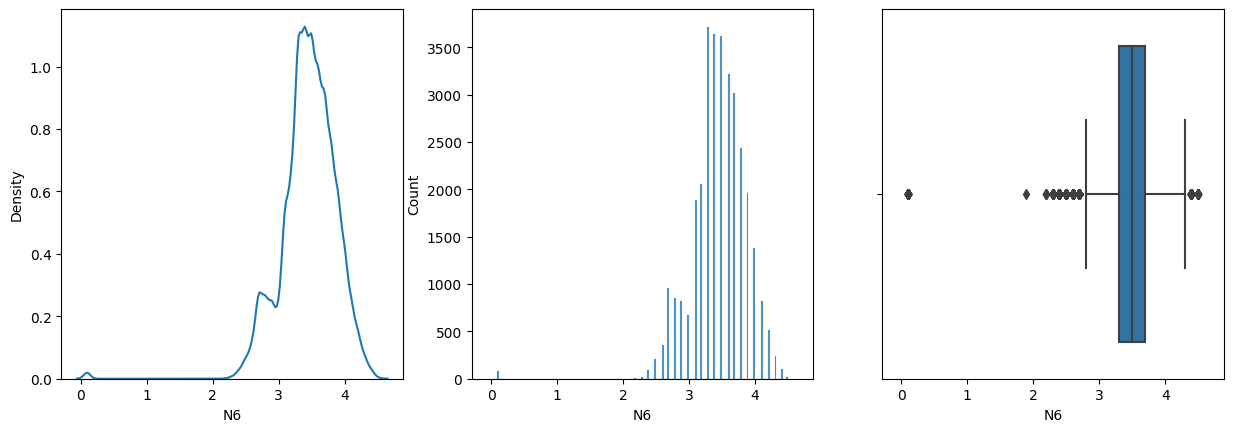

********************************************************************************
N7


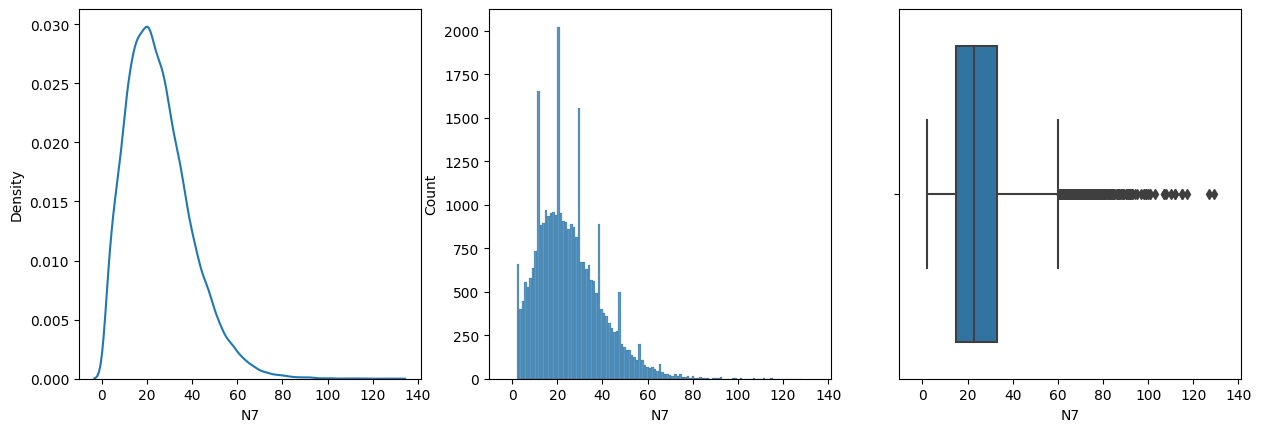

********************************************************************************
N8


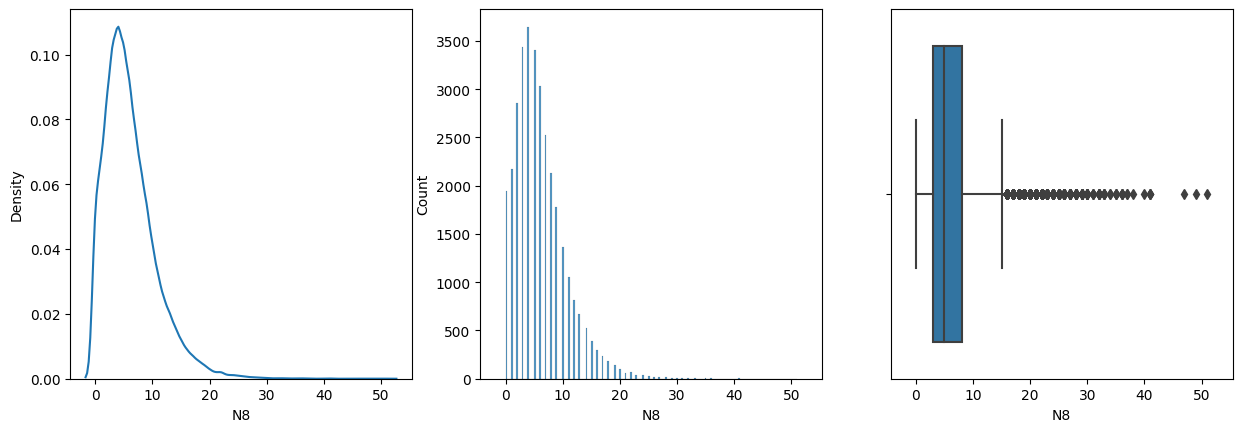

********************************************************************************
N9


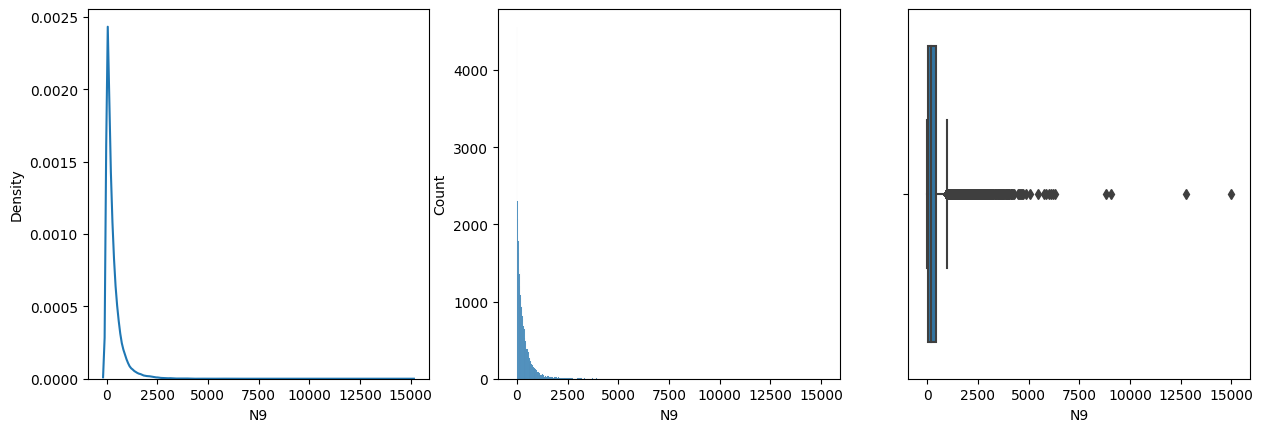

********************************************************************************
N10


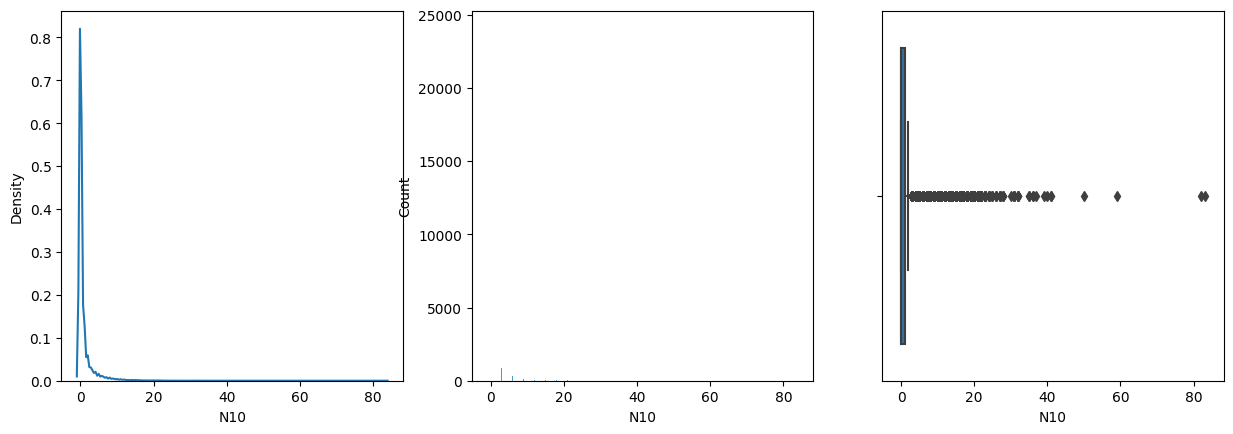

********************************************************************************
N10.1


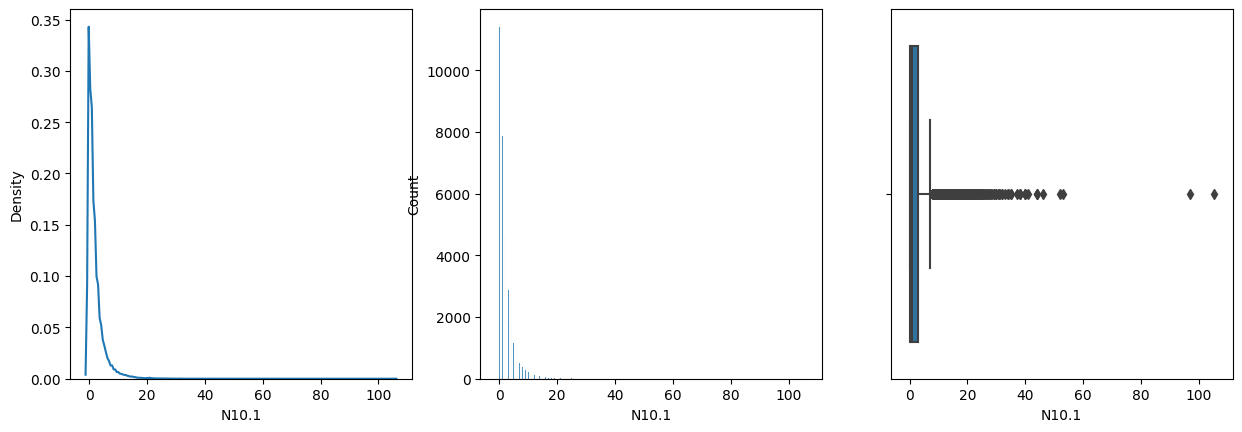

********************************************************************************
N11


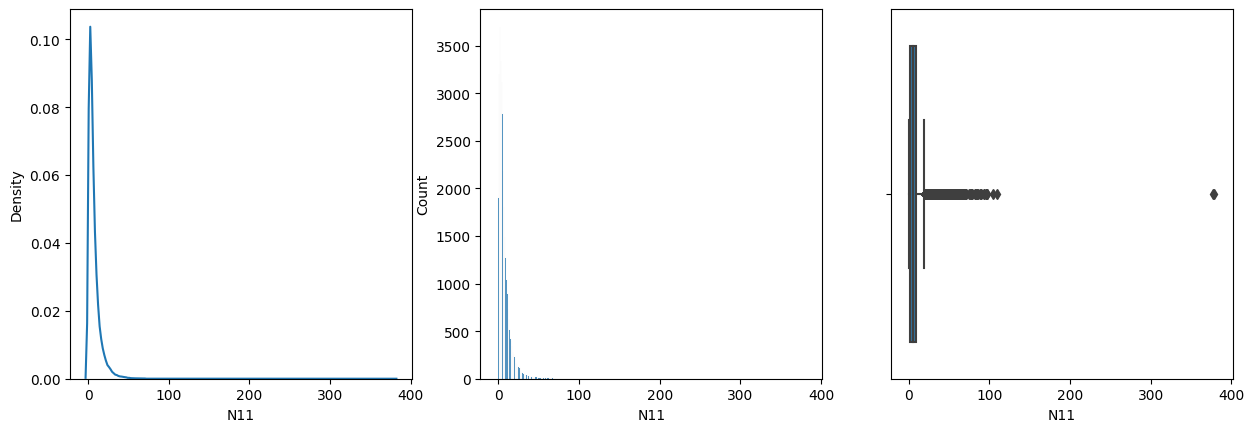

********************************************************************************
N12


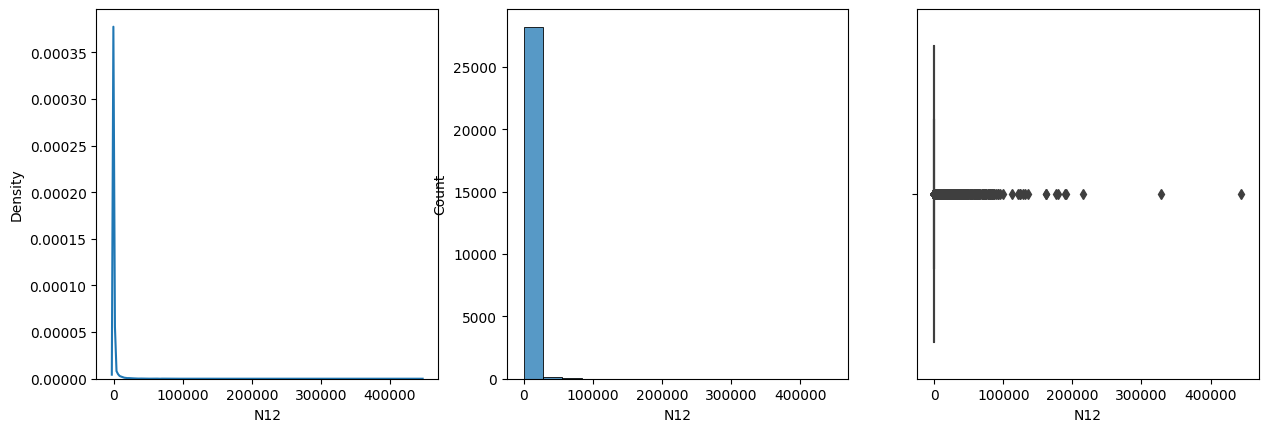

********************************************************************************
N14


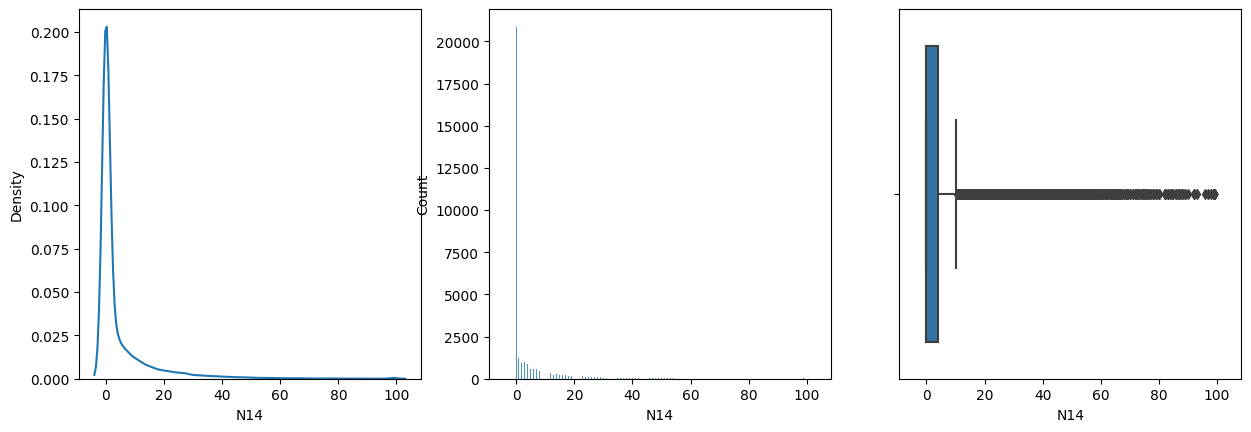

********************************************************************************
N15


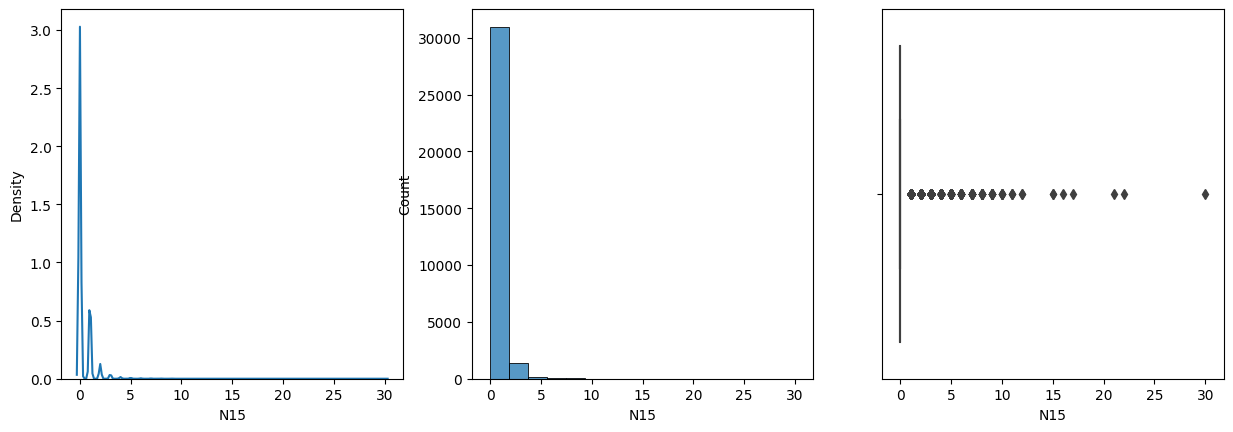

********************************************************************************
N16


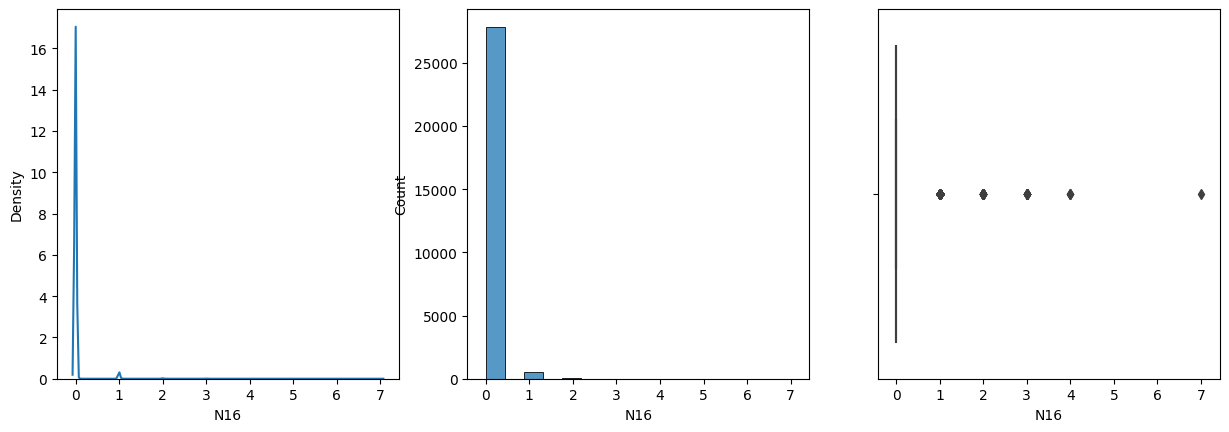

********************************************************************************
N17


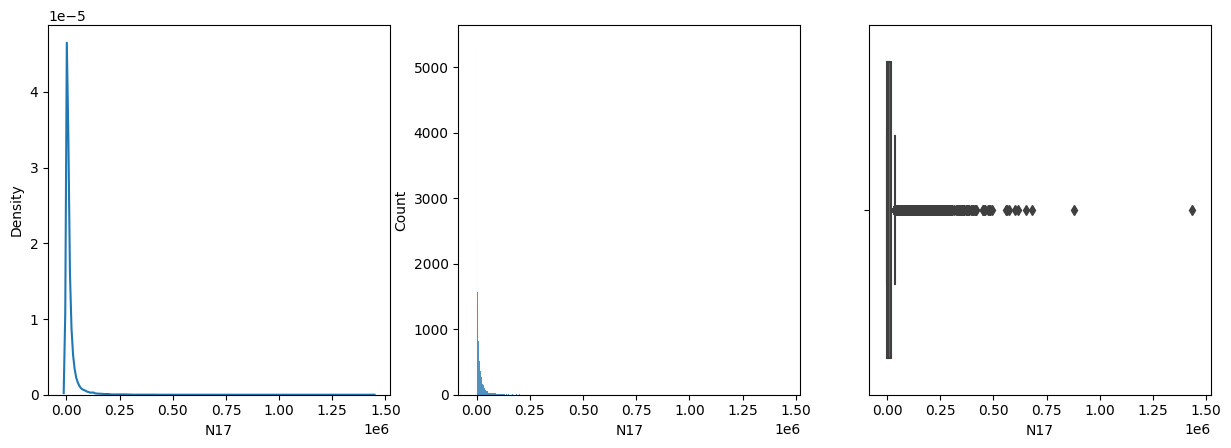

********************************************************************************
N18


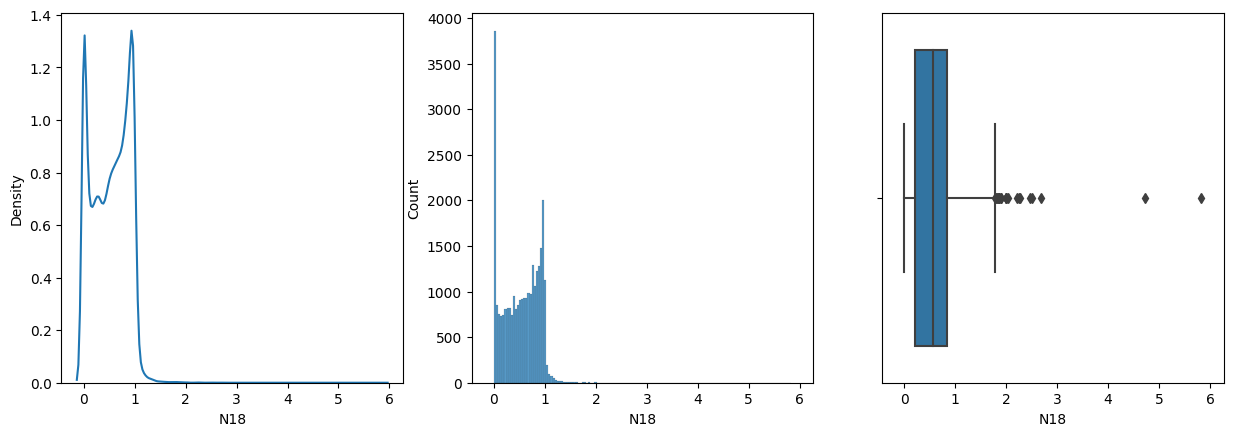

********************************************************************************
N19


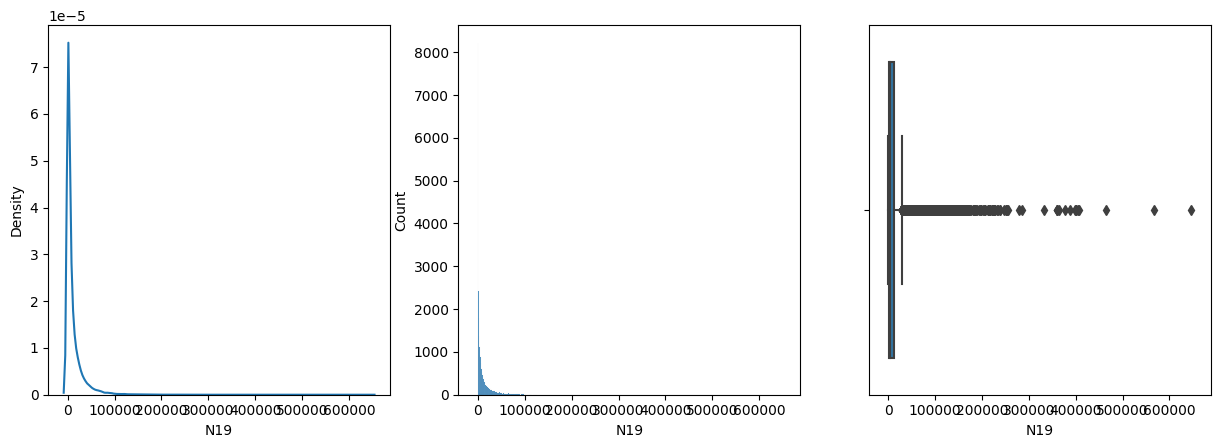

********************************************************************************
N20


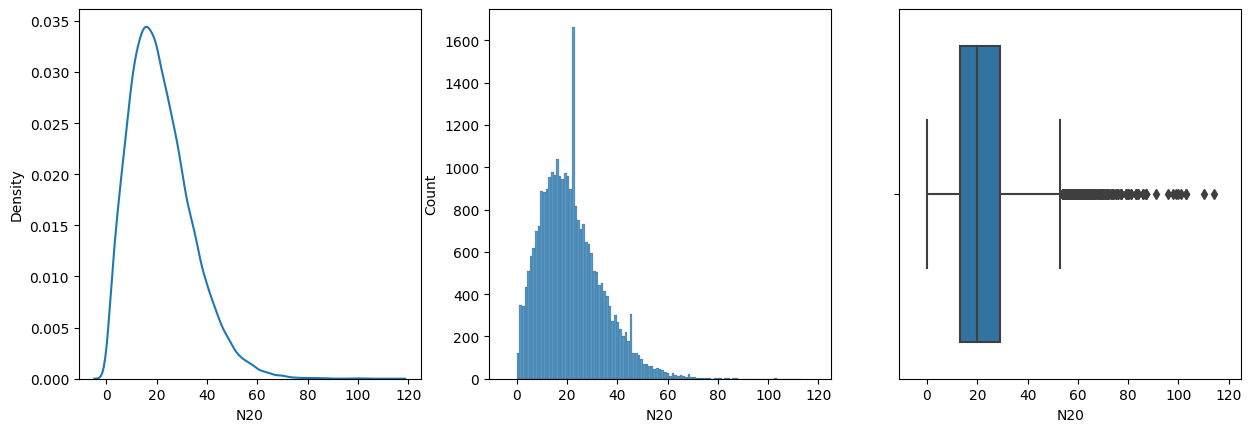

********************************************************************************
N21


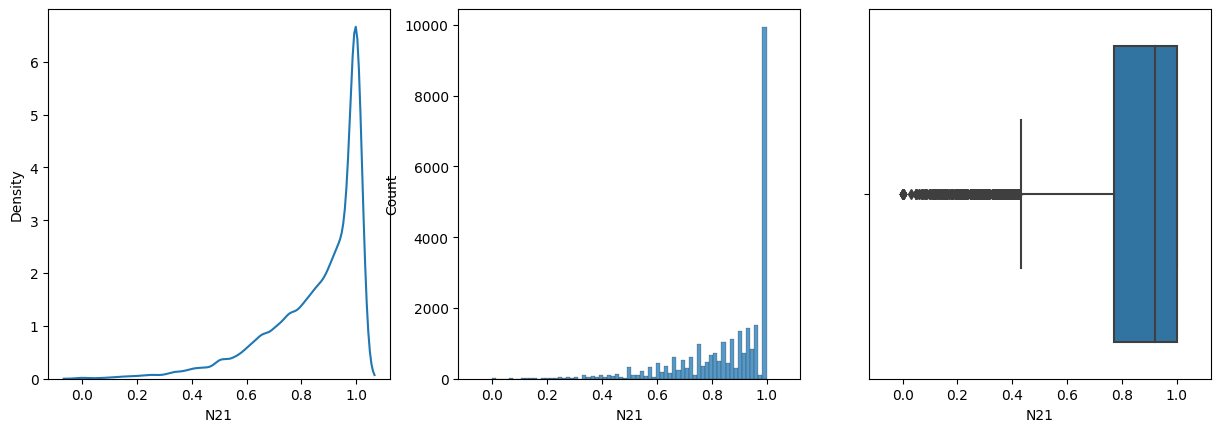

********************************************************************************
N22


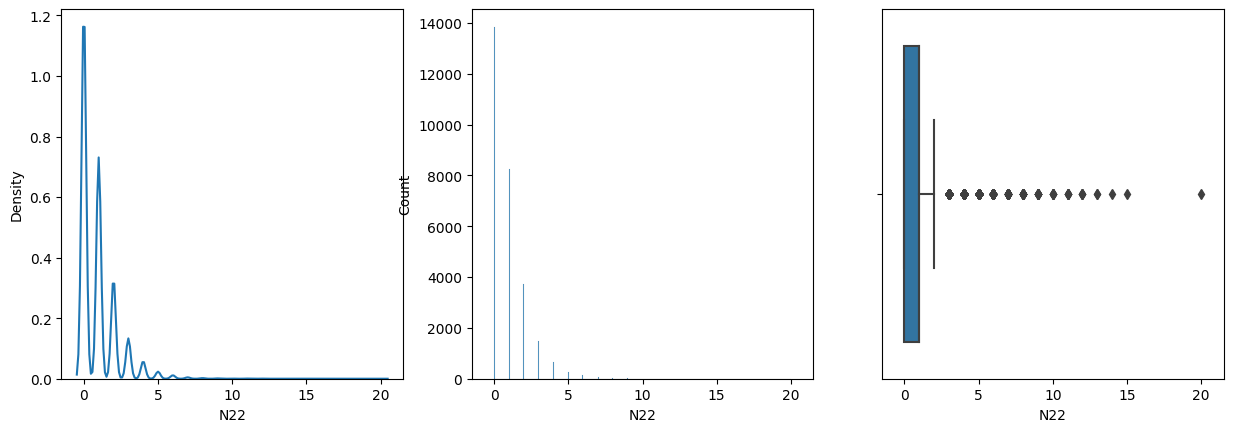

********************************************************************************
N23


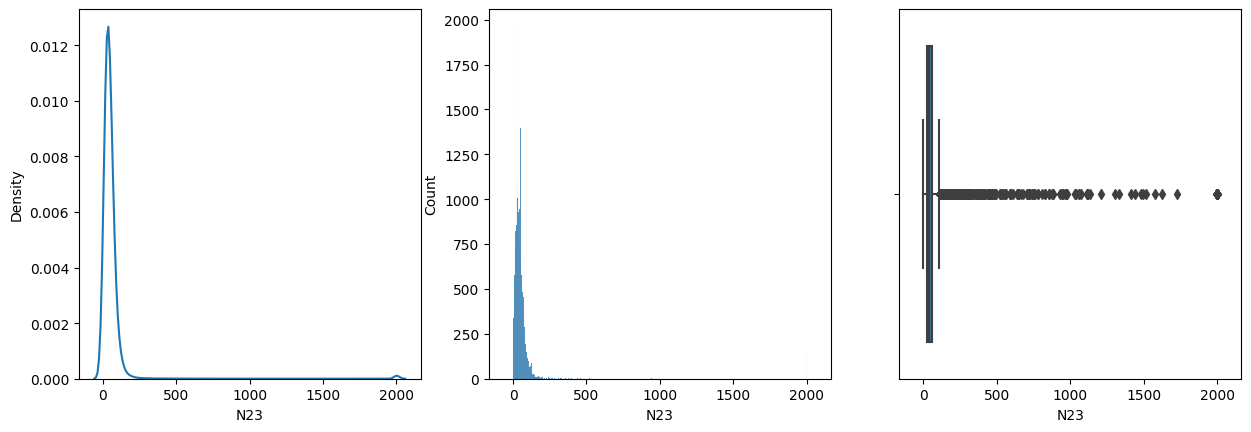

********************************************************************************
N24


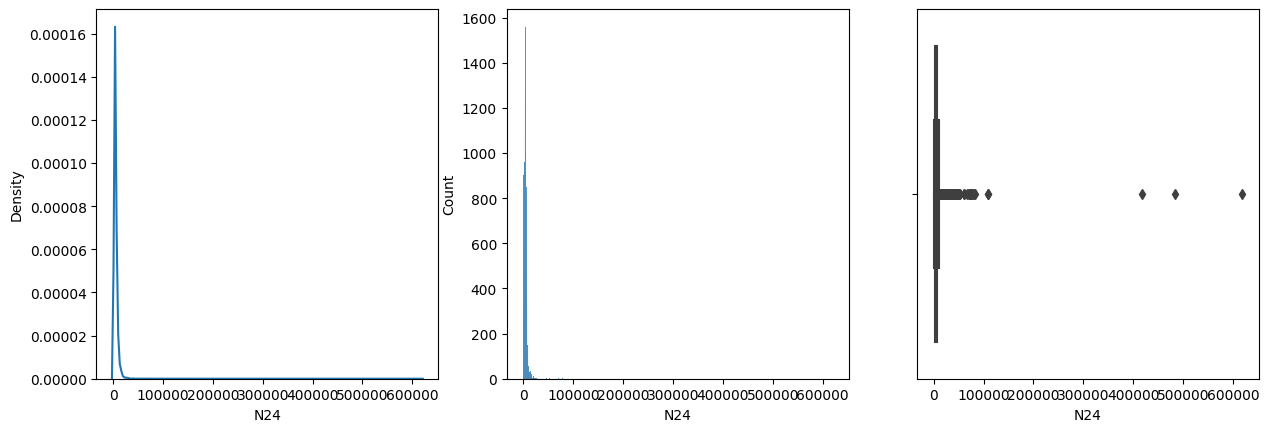

********************************************************************************
N25


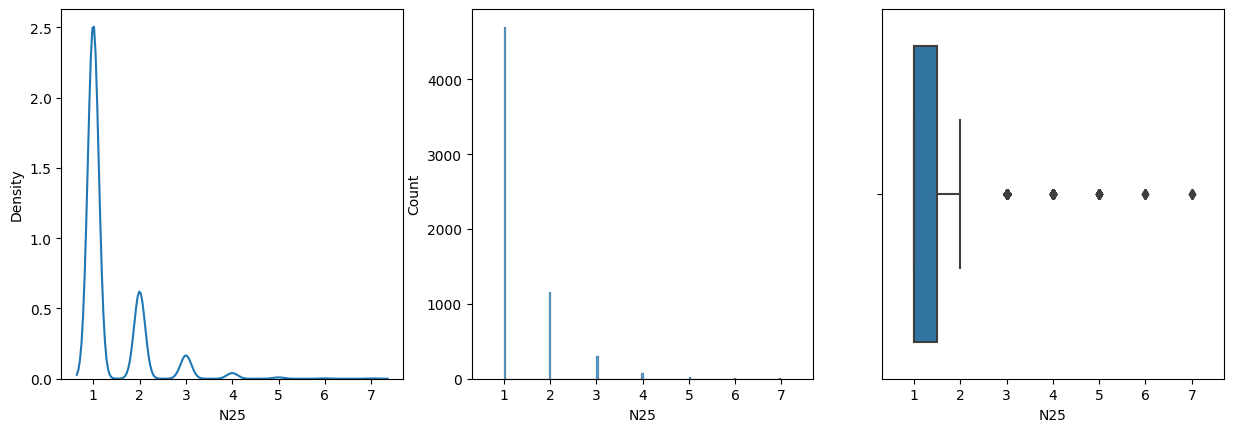

********************************************************************************
N26


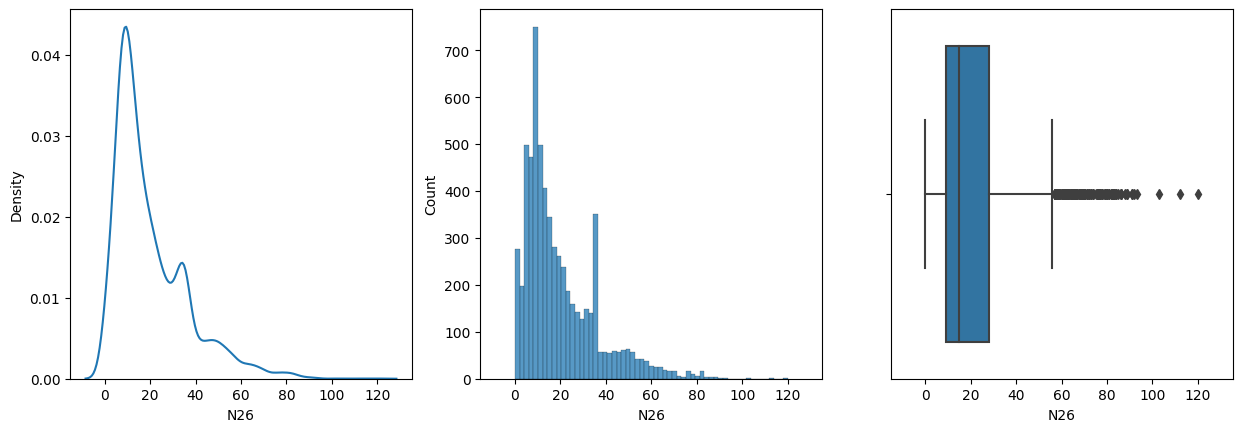

********************************************************************************
N27


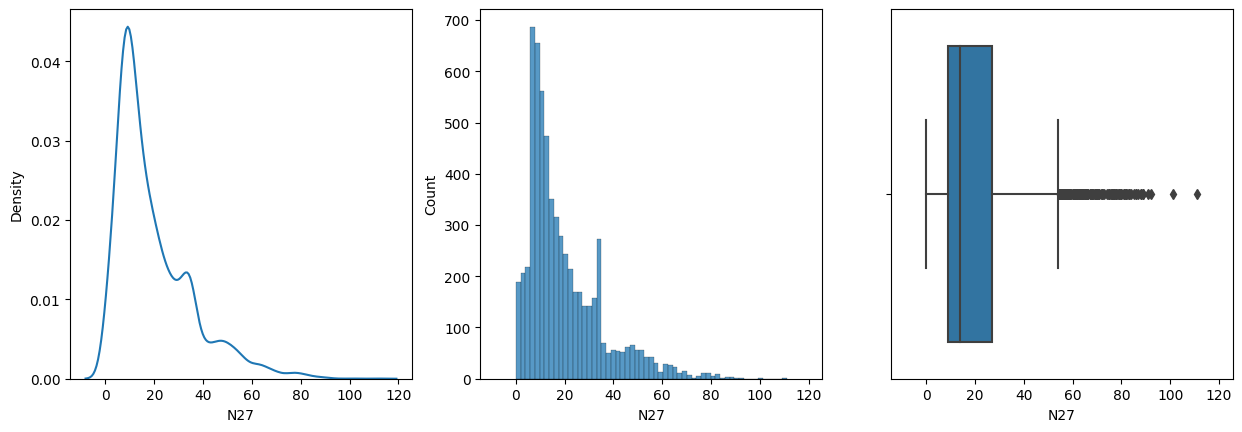

********************************************************************************
N28


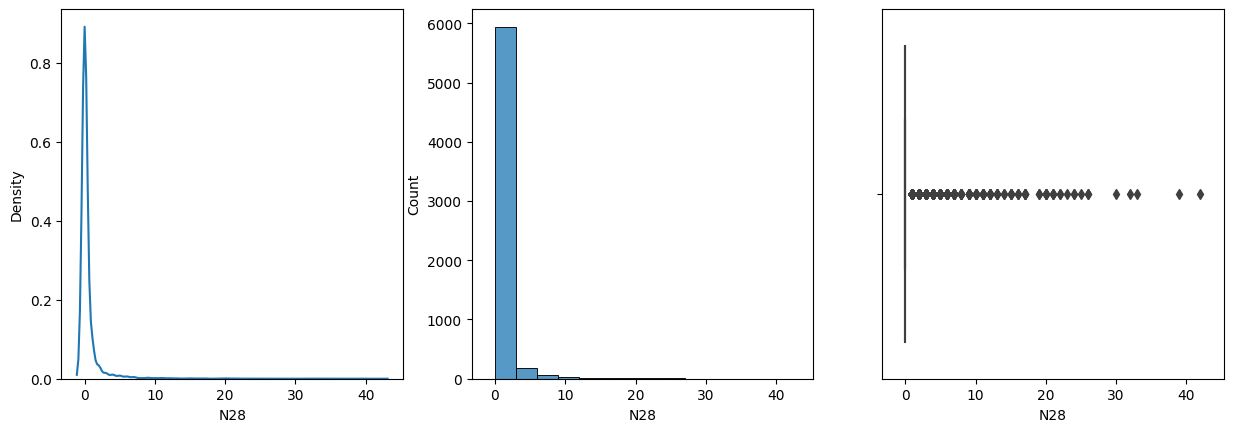

********************************************************************************
N29


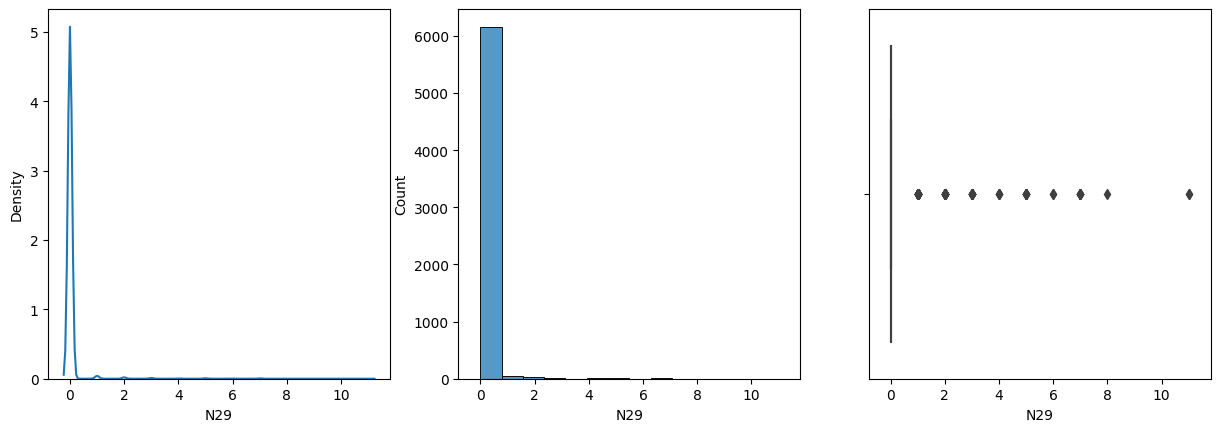

********************************************************************************
N30


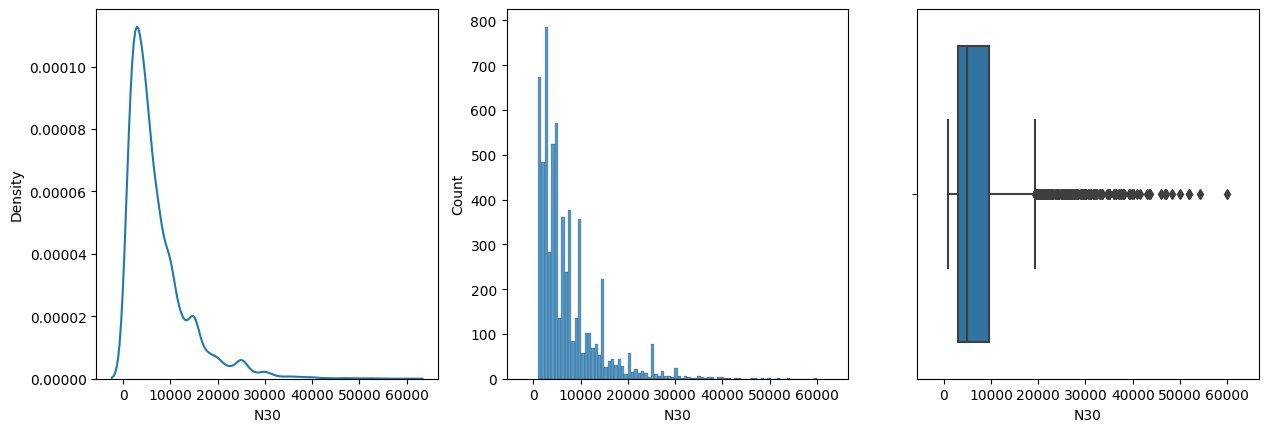

********************************************************************************
N31


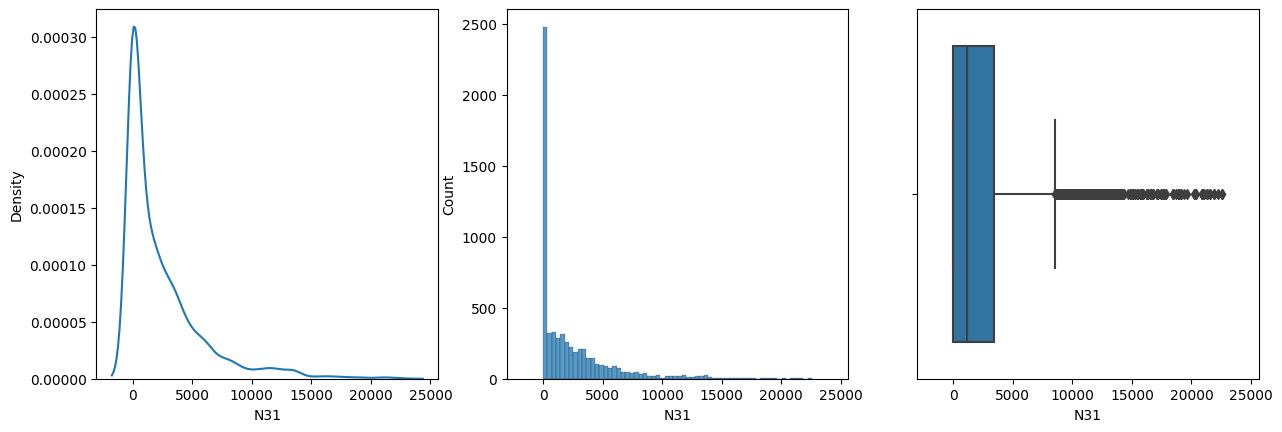

********************************************************************************
N32


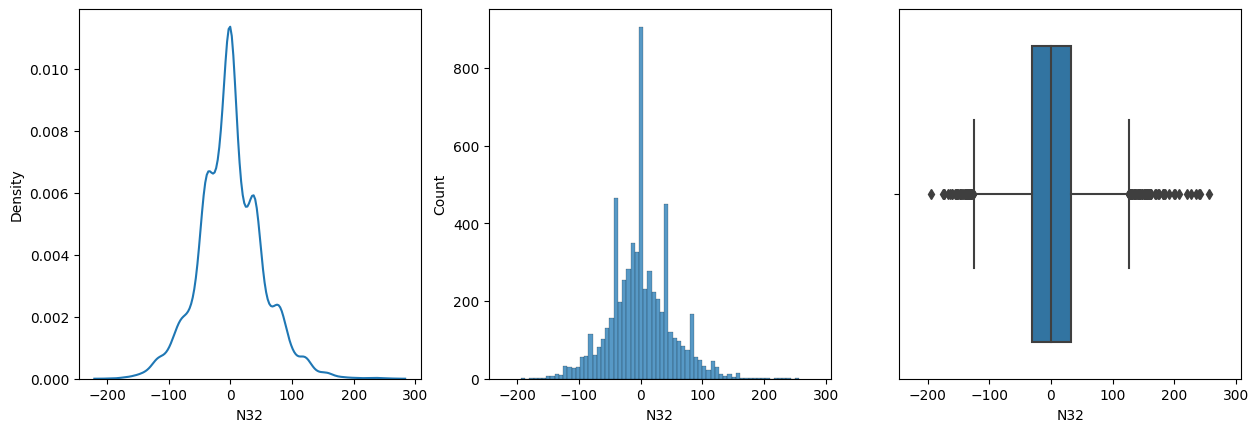

********************************************************************************
N33


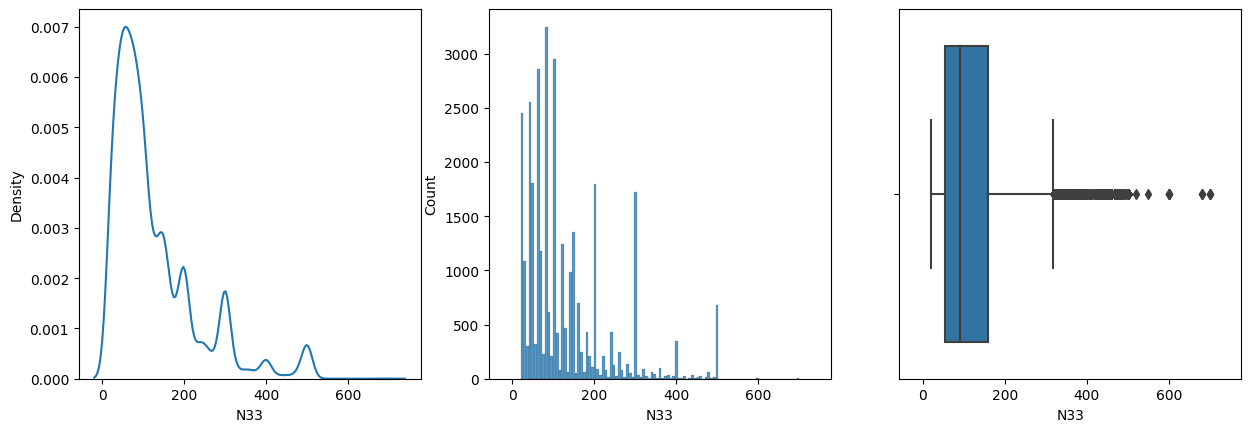

********************************************************************************
N34


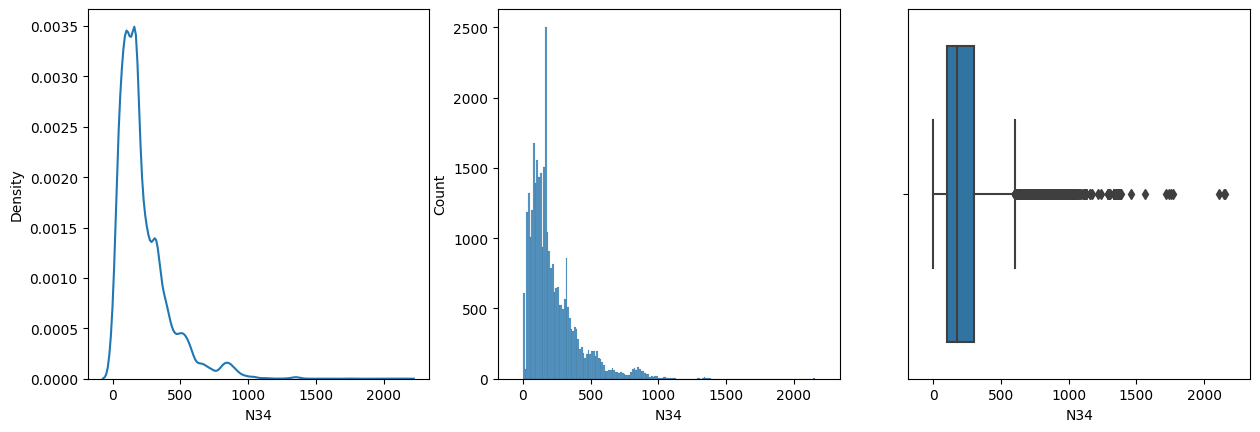

********************************************************************************
N35


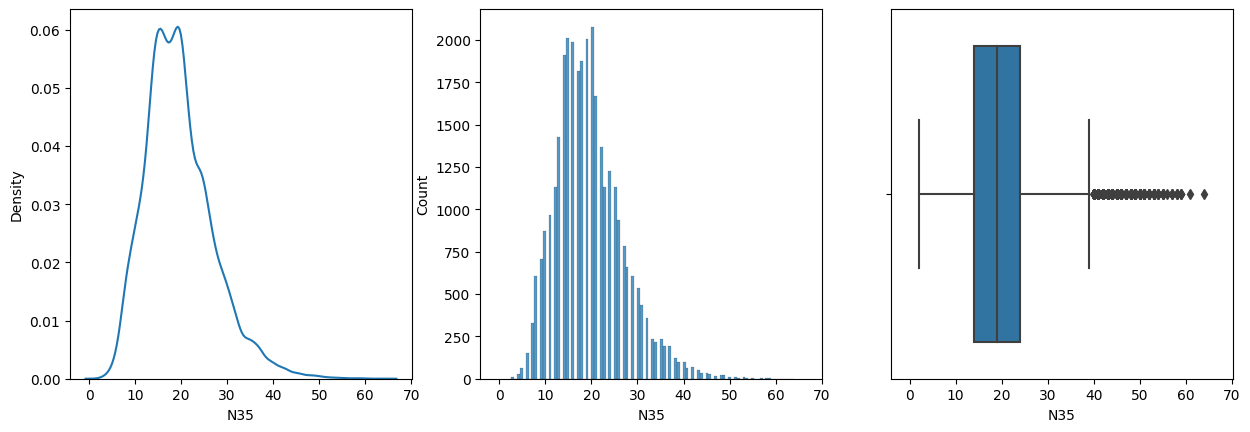

In [50]:
for feat in col:
    if feat.startswith('N'):
        fig , ax = plt.subplots( nrows=1,ncols=3 ,sharex=True)
        print('*'*80)
        print(feat)
        sns.kdeplot(data=X , x=feat , ax=ax[0] )
        sns.histplot(data=X , x=feat , ax = ax[1])
        sns.boxplot(data=X,x=feat,ax=ax[2])
        fig.set_figwidth(15)
        plt.show()

In [79]:
drop_col = ['N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32']

In [65]:
X = X.drop(['N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32'],axis=1)

In [152]:
X.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3', 'N4',
       'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14',
       'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24',
       'N33', 'N34', 'N35'],
      dtype='object')

In [68]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
C1,33050.0,1.119818,0.399382,1.000,1.000000,1.000000,1.0000,3.000000e+00
C2,33050.0,2.403873,3.399024,0.000,0.000000,1.000000,3.0000,2.000000e+01
C3,33050.0,12.856097,12.013457,0.000,2.000000,10.000000,20.0000,5.100000e+01
C4,33050.0,14.437398,15.527474,0.000,1.000000,10.000000,26.0000,6.700000e+01
C5,33050.0,1.719395,1.320860,0.000,1.000000,2.000000,2.0000,7.000000e+00
C7,33050.0,3.124932,2.158905,0.000,1.000000,4.000000,4.0000,7.000000e+00
N1,33050.0,19.976530,8.110870,0.000,13.450000,19.275000,26.9000,4.800000e+01
N2,28438.0,81.342710,85.397795,0.000,21.000000,53.000000,112.0000,7.550000e+02
N3,32685.0,3.359361,0.411040,0.000,3.200000,3.400000,3.6000,4.400000e+00
N4,28444.0,9.574075,5.584756,0.000,6.000000,9.000000,13.0000,5.900000e+01


In [70]:
df = pd.merge(X,y, on='Unique_ID')

In [71]:
df

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N19,N20,N21,N22,N23,N24,N33,N34,N35,Dependent_Variable
Unique_ID,,,,,,,,,,,,,,,,,,,,,
Candidate_5926,1,0,11,31,0,False,0,True,23.75,NaN,...,NaN,NaN,NaN,NaN,27.816,1750.000000,58.00,113.39,12.0,1
Candidate_48134,1,4,2,66,2,False,1,True,11.05,22.0,...,25856.0,17.0,0.88,1.0,40.000,10833.333330,160.00,262.10,17.0,0
Candidate_51717,1,0,19,2,0,False,0,True,29.00,NaN,...,NaN,NaN,NaN,NaN,20.000,6250.000000,24.00,50.29,18.0,1
Candidate_26401,1,1,16,47,1,False,4,True,17.99,1.0,...,1006.0,6.0,1.00,0.0,26.000,2413.666667,70.00,126.52,27.0,0
Candidate_34872,1,1,13,1,1,True,6,True,27.50,206.0,...,3398.0,31.0,0.96,0.0,44.000,7666.666667,100.00,205.47,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Candidate_26099,1,1,14,41,2,False,6,True,15.50,19.0,...,7661.0,7.0,1.00,0.0,18.000,7000.000000,199.98,349.07,8.0,0
Candidate_33316,1,6,10,1,2,True,2,True,32.20,42.0,...,868.0,41.0,0.63,2.0,42.000,4420.000000,40.00,87.33,19.0,0
Candidate_36027,1,1,2,4,2,False,6,True,8.99,137.0,...,20105.0,28.0,0.75,0.0,18.000,6971.833333,40.00,63.59,20.0,0


In [73]:
X_test = pd.read_csv('Test/X_test.csv',index_col='Unique_ID')

In [75]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
C1,11017.0,1.125533,0.409512,1.000,1.000000,1.000000,1.0000,3.000
C2,11017.0,2.463647,3.409954,0.000,0.000000,1.000000,3.0000,20.000
C3,11017.0,12.883997,11.964840,0.000,2.000000,10.000000,20.0000,51.000
C4,11017.0,14.488427,15.628293,0.000,1.000000,10.000000,24.0000,67.000
C5,11017.0,1.735046,1.324165,0.000,1.000000,2.000000,2.0000,7.000
C7,11017.0,3.117636,2.133982,0.000,2.000000,4.000000,4.0000,7.000
N1,11017.0,20.092037,8.149355,0.000,13.500000,19.500000,26.9900,49.750
N2,9528.0,81.279492,83.802131,0.000,21.000000,53.000000,114.0000,551.000
N3,10905.0,3.360064,0.404097,0.000,3.200000,3.400000,3.6000,4.400
N4,9529.0,9.529961,5.533917,0.000,6.000000,9.000000,13.0000,56.000


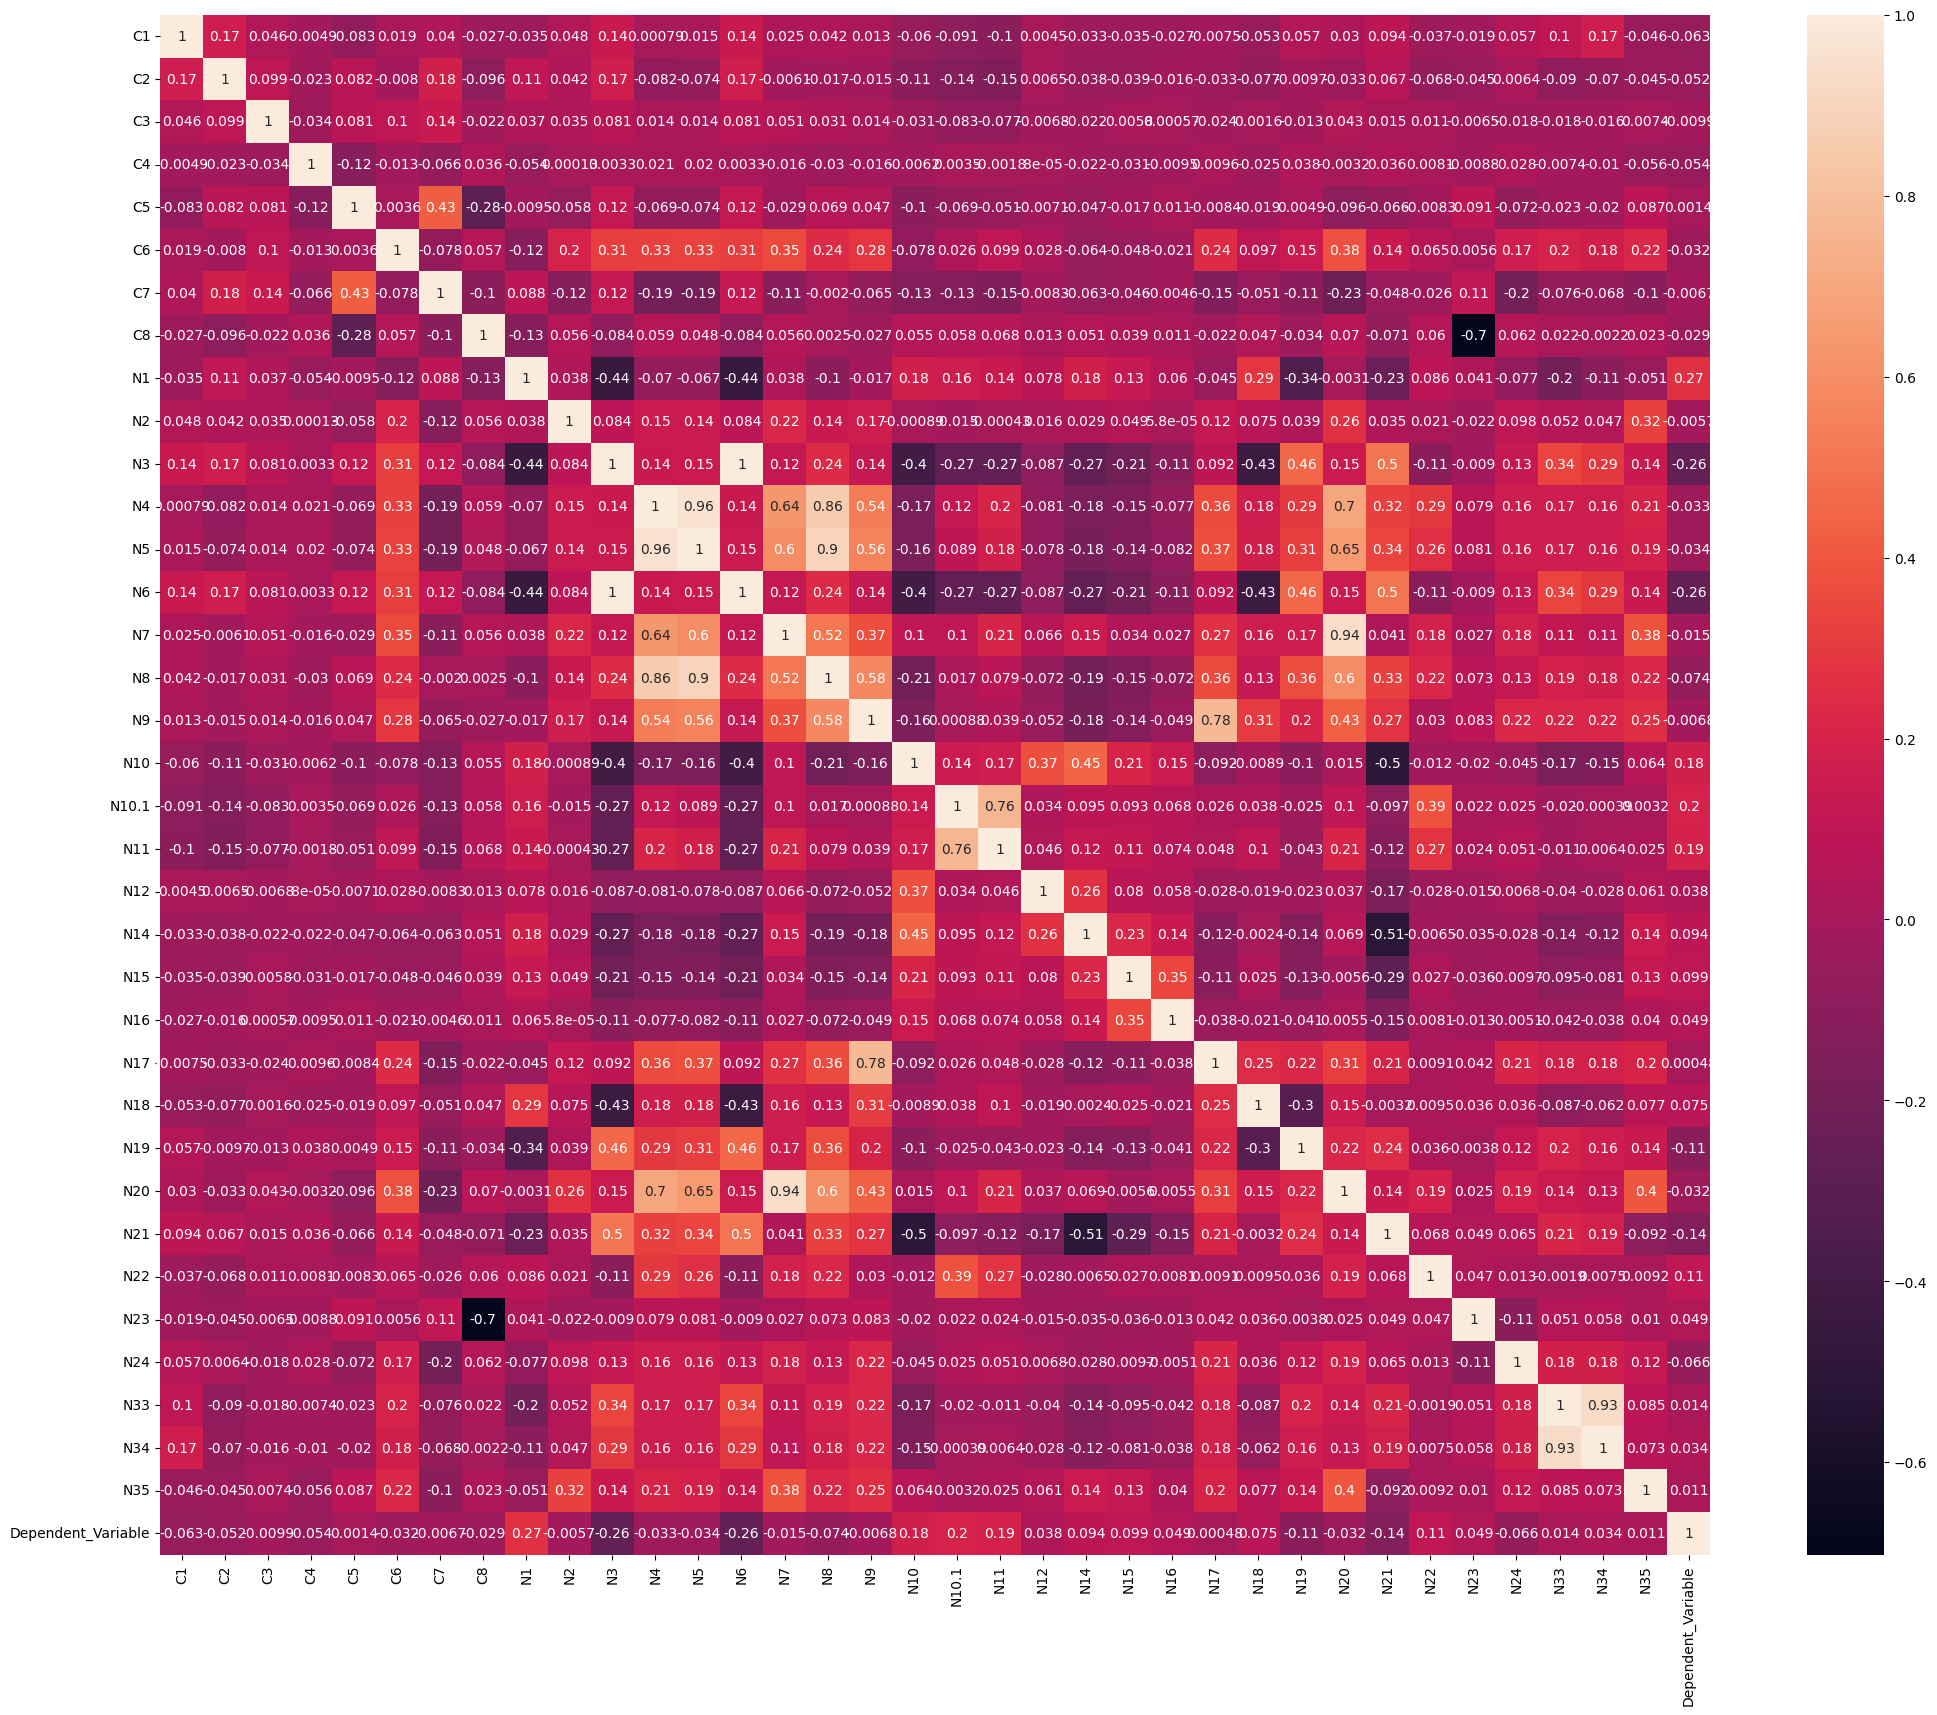

In [78]:
correlation = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(25, 20)
sns.heatmap(data=correlation,annot=True)
plt.show()

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [165]:
X_train.shape

(23135, 35)

In [154]:
X_val.shape

(9915, 35)

In [99]:
X_test = X_test.drop(drop_col,axis=1)

In [155]:
X_test.shape

(11017, 35)

In [103]:
cat_col, num_col = list(), list()
for el in col:
    if el.startswith('num_col      cat_col.append(el)
    else:
        num_col.append(el)
print(cat_col, num_col)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'] ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N34', 'N35']


In [112]:
num_col = list(set(num_col)-set(drop_col))

In [108]:
from sklearn.impute import SimpleImputer

cat_Imputer = SimpleImputer(strategy = 'constant')
num_Imputer = SimpleImputer()

In [113]:
X_train[cat_col] = cat_Imputer.fit_transform(X_train[cat_col])
X_train[num_col] = num_Imputer.fit_transform(X_train[num_col])

X_val[cat_col] = cat_Imputer.transform(X_val[cat_col])
X_val[num_col] = num_Imputer.transform(X_val[num_col])

X_test[cat_col] = cat_Imputer.transform(X_test[cat_col])
X_test[num_col] = num_Imputer.transform(X_test[num_col])

In [115]:
X_train.isnull().sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
N1       0
N2       0
N3       0
N4       0
N5       0
N6       0
N7       0
N8       0
N9       0
N10      0
N10.1    0
N11      0
N12      0
N14      0
N15      0
N16      0
N17      0
N18      0
N19      0
N20      0
N21      0
N22      0
N23      0
N24      0
N33      0
N34      0
N35      0
dtype: int64

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [156]:
preprocessor = ColumnTransformer(transformers = [('minmax',MinMaxScaler(), num_col),
                                                 ('onehot', OneHotEncoder(), cat_col)],remainder='passthrough')


In [166]:
X_temp = preprocessor.fit_transform(X_train)

In [172]:
y_temp = modelLR.fit_predict(X_temp,y_train['Dependent_Variable'])


AttributeError: 'LogisticRegression' object has no attribute 'fit_predict'

In [171]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(solver='saga')
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('modelLR', modelLR)])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax', MinMaxScaler(),
                                                  ['N12', 'N34', 'N9', 'N20',
                                                   'N35', 'N14', 'N10.1', 'N33',
                                                   'N5', 'N2', 'N16', 'N10',
                                                   'N4', 'N24', 'N7', 'N15',
                                                   'N18', 'N19', 'N11', 'N1',
                                                   'N23', 'N21', 'N22', 'N8',
                                                   'N3', 'N6', 'N17']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['C1', 'C2', 'C3', 'C4', 'C5',
                                                   'C6', 'C7', 'C8'])])),
                ('modelLR', LogisticRegression(solver='sag

In [173]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {
        "modelLR__penalty" :['l1','l2','elasticnet'],
        "modelLR__C": [0.1, 1.0, 10.0,100.0],
    }
]

In [174]:
grid_search = RandomizedSearchCV(model_pipeline, param_grid, cv=5, verbose=1,n_jobs=-1,scoring='roc_auc')
grid_search.fit(X_train, y_train['Dependent_Variable'])

print(f"Best params:")
print(grid_search.best_params_)
print("Best score in grid search:")
print(grid_search.best_score_)
print("best logistic regression from grid search:")
print(grid_search.score(X_val, y_val['Dependent_Variable']))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/harinadhkunapareddy/opt/anaconda3/envs/ttest/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/harinadhkunapareddy/opt/anaconda3/envs/ttest/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/harinadhkunapareddy/opt/anaconda3/envs/ttest/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/harinadhkunapareddy/opt/anaconda3

Best params:
{'modelLR__penalty': 'l1', 'modelLR__C': 10.0}
Best score in grid search:
nan
best logistic regression from grid search:
0.7554097086447


/Users/harinadhkunapareddy/opt/anaconda3/envs/ttest/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

#transform columns
#num_cols = numerical columns, categorical_col = categorical columns
preprocessor = ColumnTransformer(transformers = [('minmax',MinMaxScaler(), num_cols),
                                                 ('onehot', OneHotEncoder(), categorical_col)])

#model
model = RandomForestClassifier(random_state=0)

#model pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

model_pipeline.fit(x_train, y_train)